# Nivel 1
Realiza la conexión en Python con MySQL Workbench para cargar toda la información que tienes en las tablas.

Realizarás una visualización para cada ejercicio. Comenta lo que te llame la atención de graficar esta variable, justifica la elección del gráfico e interpreta los resultados en función de tus datos.

In [23]:

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector
import plotly.express as px

In [24]:
operaciones = mysql.connector.connect(
  host="localhost",
  user="root",
  password="1234",
  database="operaciones"
)
print(operaciones)
mycursor = operaciones.cursor()
mycursor.execute("SHOW TABLES")
for x in mycursor:
  print(x)


('companies',)
('credit_card',)
('estado_tarjeta',)
('products',)
('tiquets',)
('tiquets_juntos',)
('transactions',)
('users',)


## Ejercicio 1: Una variable numérica.

C:\Users\34622\AppData\Local\Temp\ipykernel_9056\3244607580.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_products = pd.read_sql(products, operaciones)


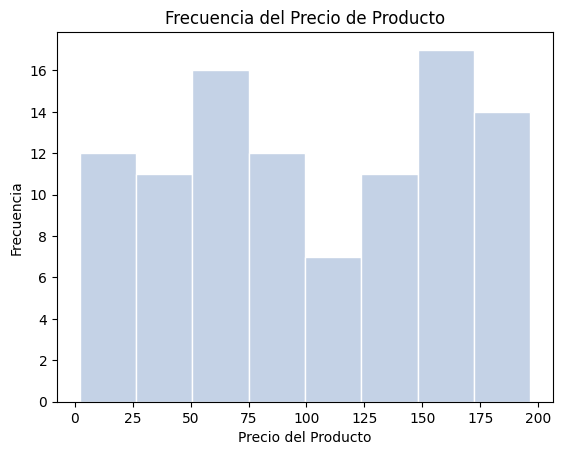

In [25]:
# Selección de datos
products = 'SELECT * FROM products'
df_products = pd.read_sql(products, operaciones)

# Crear el gráfico de barras
sns.histplot(df_products['price'], color='lightsteelblue', edgecolor='white')
plt.xlabel('Precio del Producto')
plt.ylabel('Frecuencia')
plt.title('Frecuencia del Precio de Producto')
plt.show()

## La captura de pantalla de la ejecución del código del ejercicio 1 en Power BI

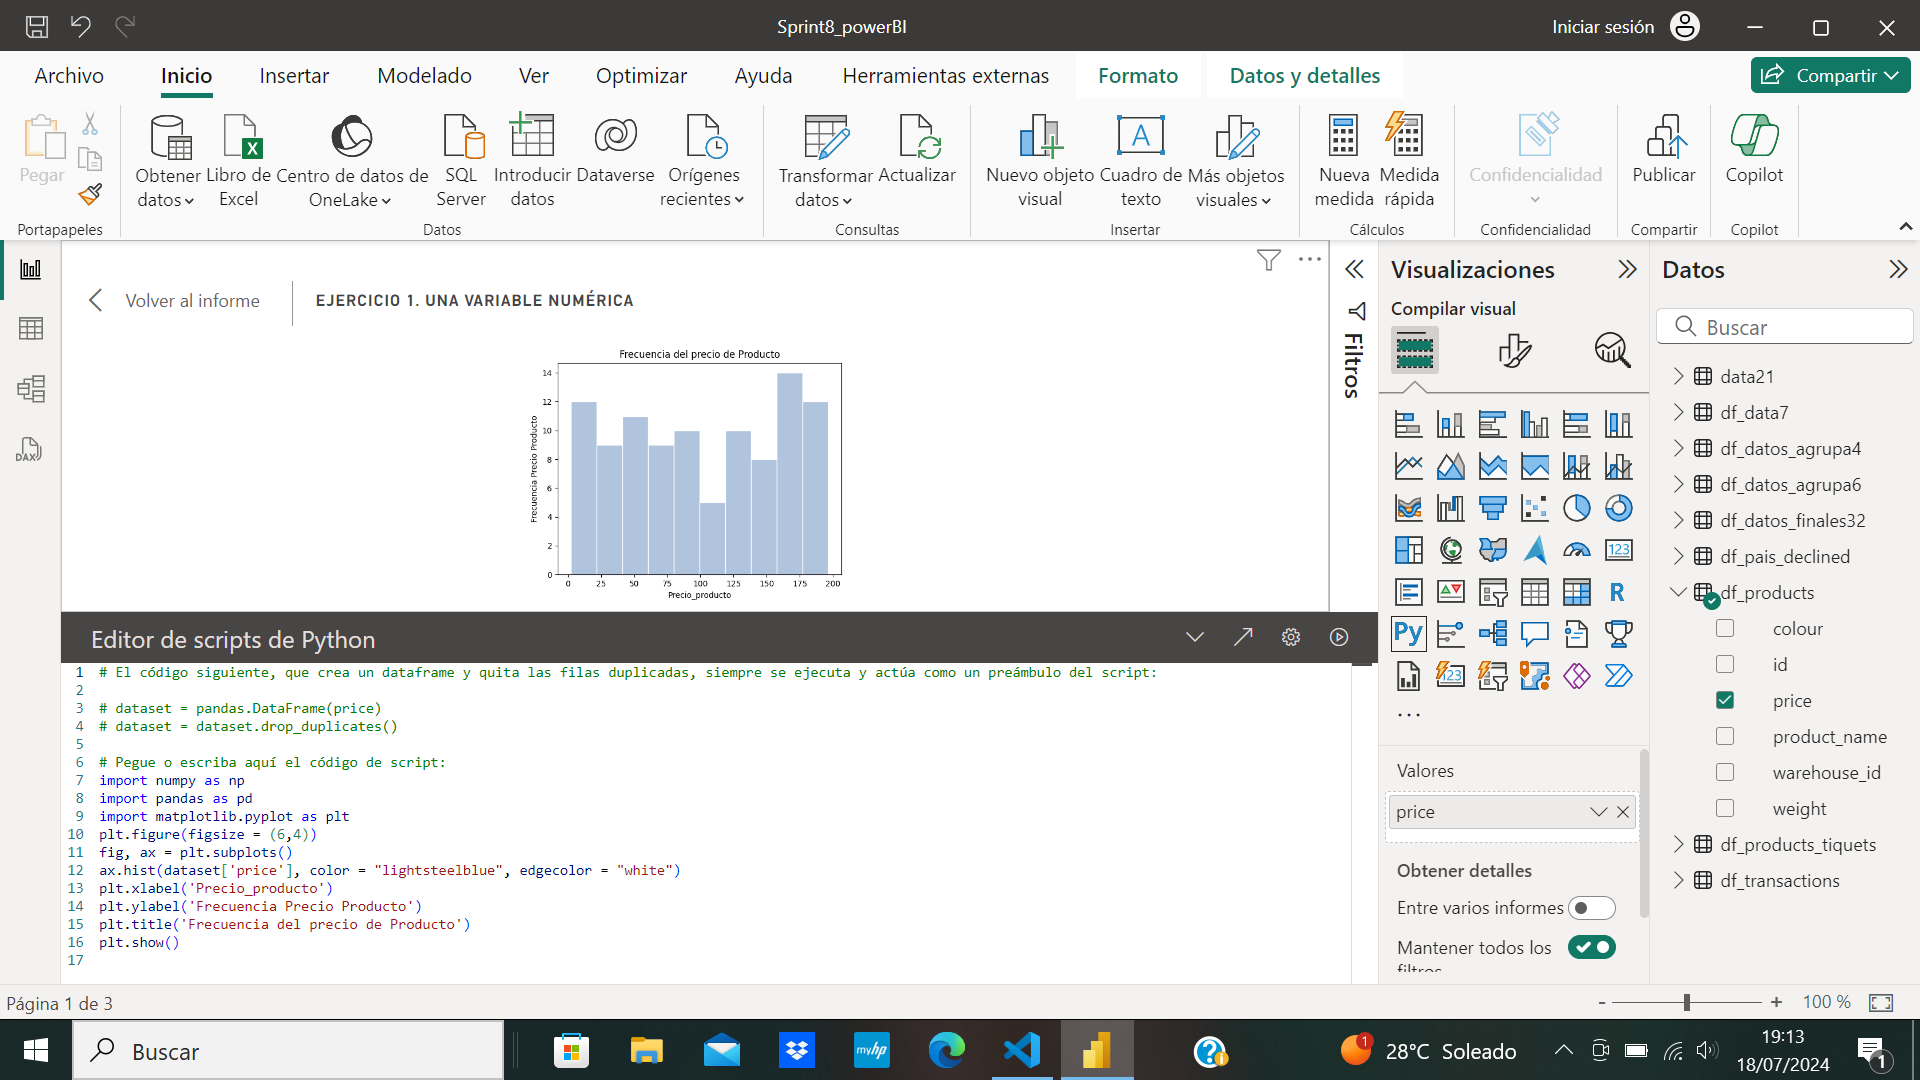

## Ejercicio 2: Dos variables numéricas.

C:\Users\34622\AppData\Local\Temp\ipykernel_9056\1215670635.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_productos = pd.read_sql(productos, operaciones)


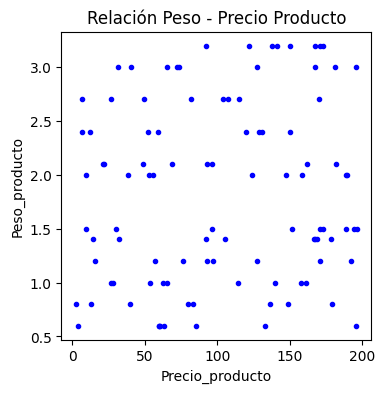

In [26]:
# Selección de datos
productos = 'SELECT * FROM products'
df_productos = pd.read_sql(productos, operaciones)

# Dibujar gráfico de dispersion
plt.figure(figsize=(4, 4))
plt.plot( 'price', 'weight', data=df_productos, linestyle='none', marker='.', color = 'blue')
plt.xlabel('Precio_producto')
plt.ylabel('Peso_producto')
plt.title('Relación Peso - Precio Producto')
plt.show()

## La captura de pantalla de la ejecución del código del ejercicio 2 del Nivel 2 en Power BI
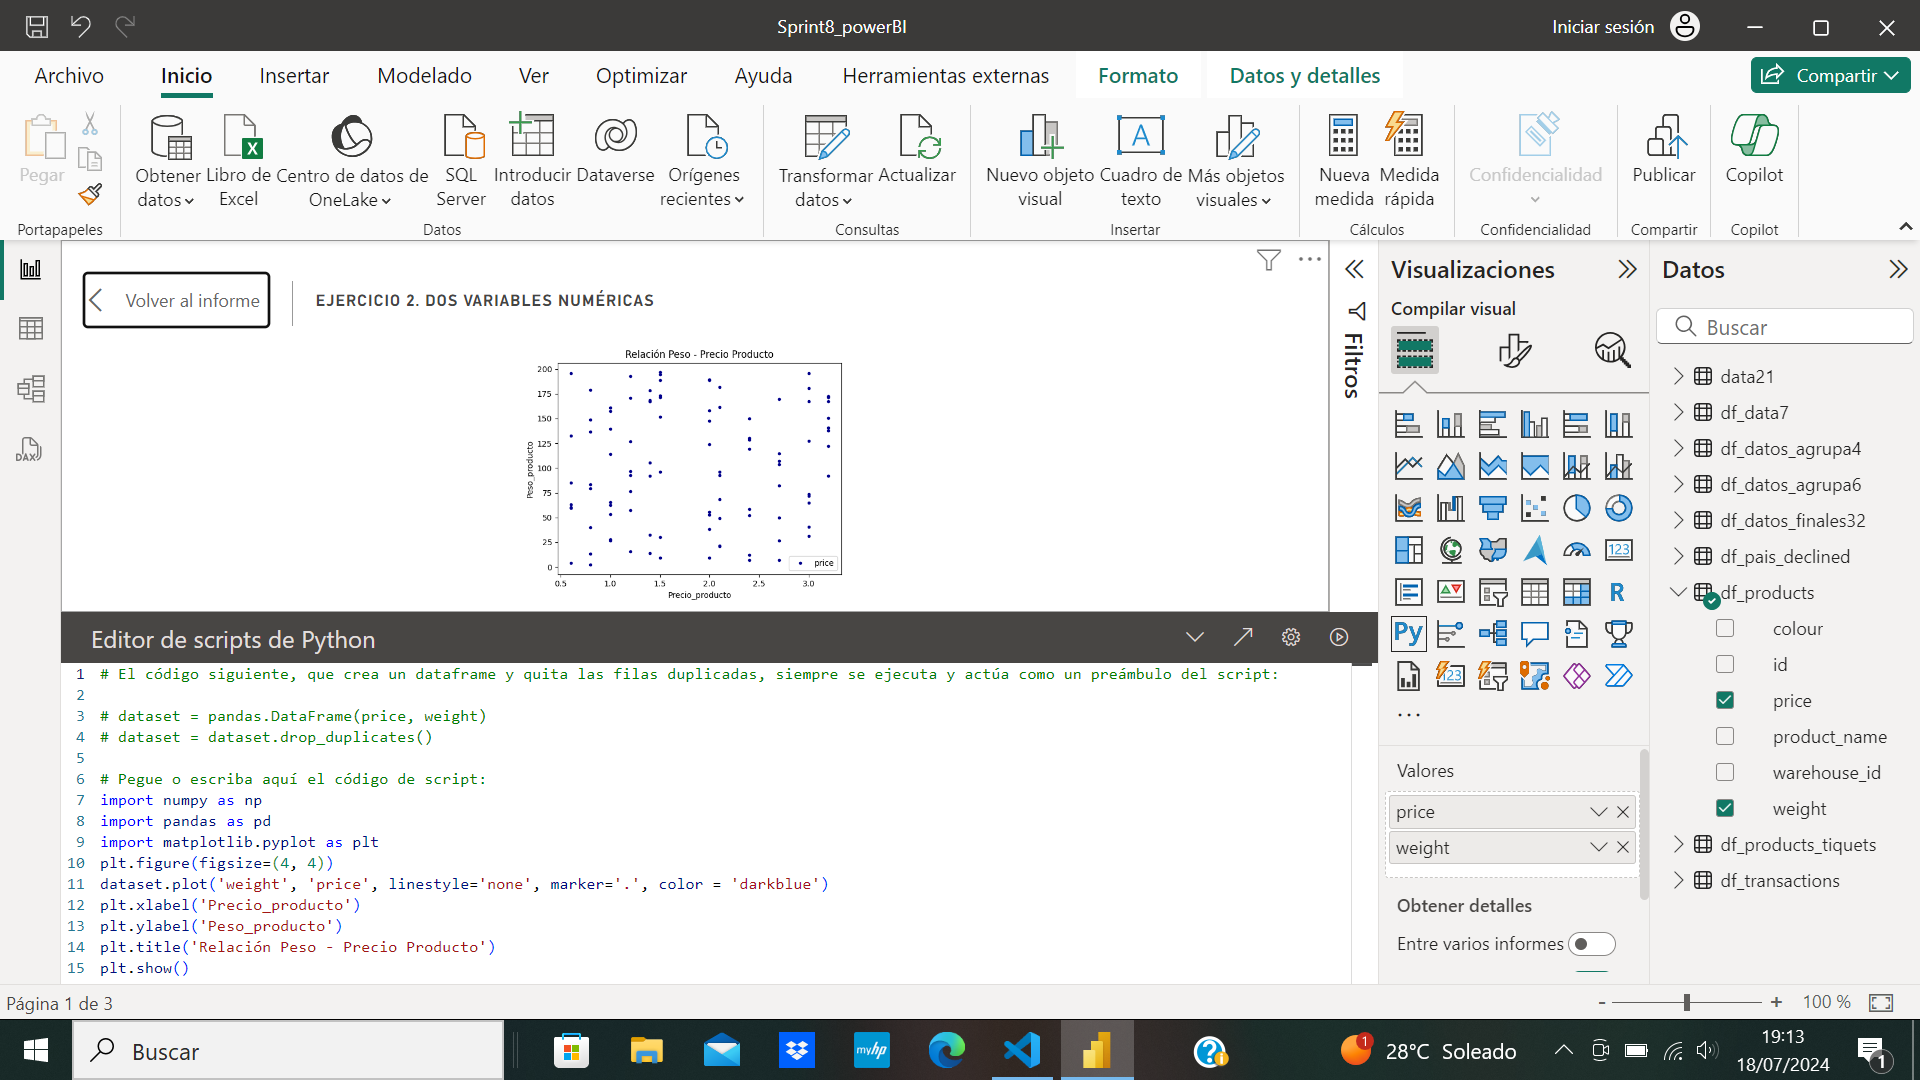

## Ejercicio 3: Una variable categórica.

C:\Users\34622\AppData\Local\Temp\ipykernel_9056\1802051394.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_tiquets = pd.read_sql(tiquets, operaciones)
C:\Users\34622\AppData\Local\Temp\ipykernel_9056\1802051394.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_products = pd.read_sql(products, operaciones)


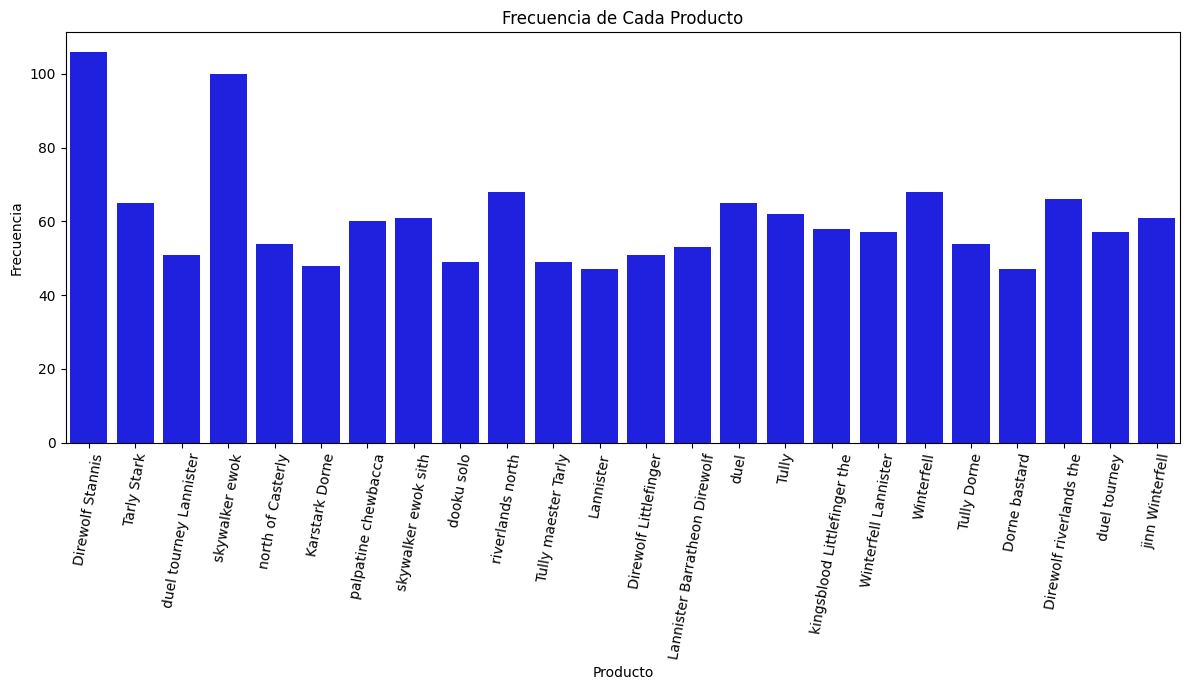

In [27]:
tiquets = 'SELECT * from tiquets;'
products = 'SELECT * FROM products'
df_tiquets = pd.read_sql(tiquets, operaciones) 
df_products = pd.read_sql(products, operaciones)
df_tiquets['product'] = df_tiquets['product'].astype(str)
df_products['id'] = df_products['id'].astype(str)
df_products_tiquets = pd.merge(df_products, df_tiquets, left_on='id', right_on='product', how='inner')

# Crear el gráfico de barras
plt.figure(figsize = (12,7))
sns.countplot(data=df_products_tiquets, x='product_name', color = 'Blue')
plt.xlabel('Producto')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Cada Producto')
plt.xticks(rotation=80)  # Rotar las etiquetas del eje X si es necesario
plt.tight_layout()  # Ajustar el layout para que las etiquetas no se corten

## La captura de pantalla de la ejecución del código del ejercicio 3 en Power BI

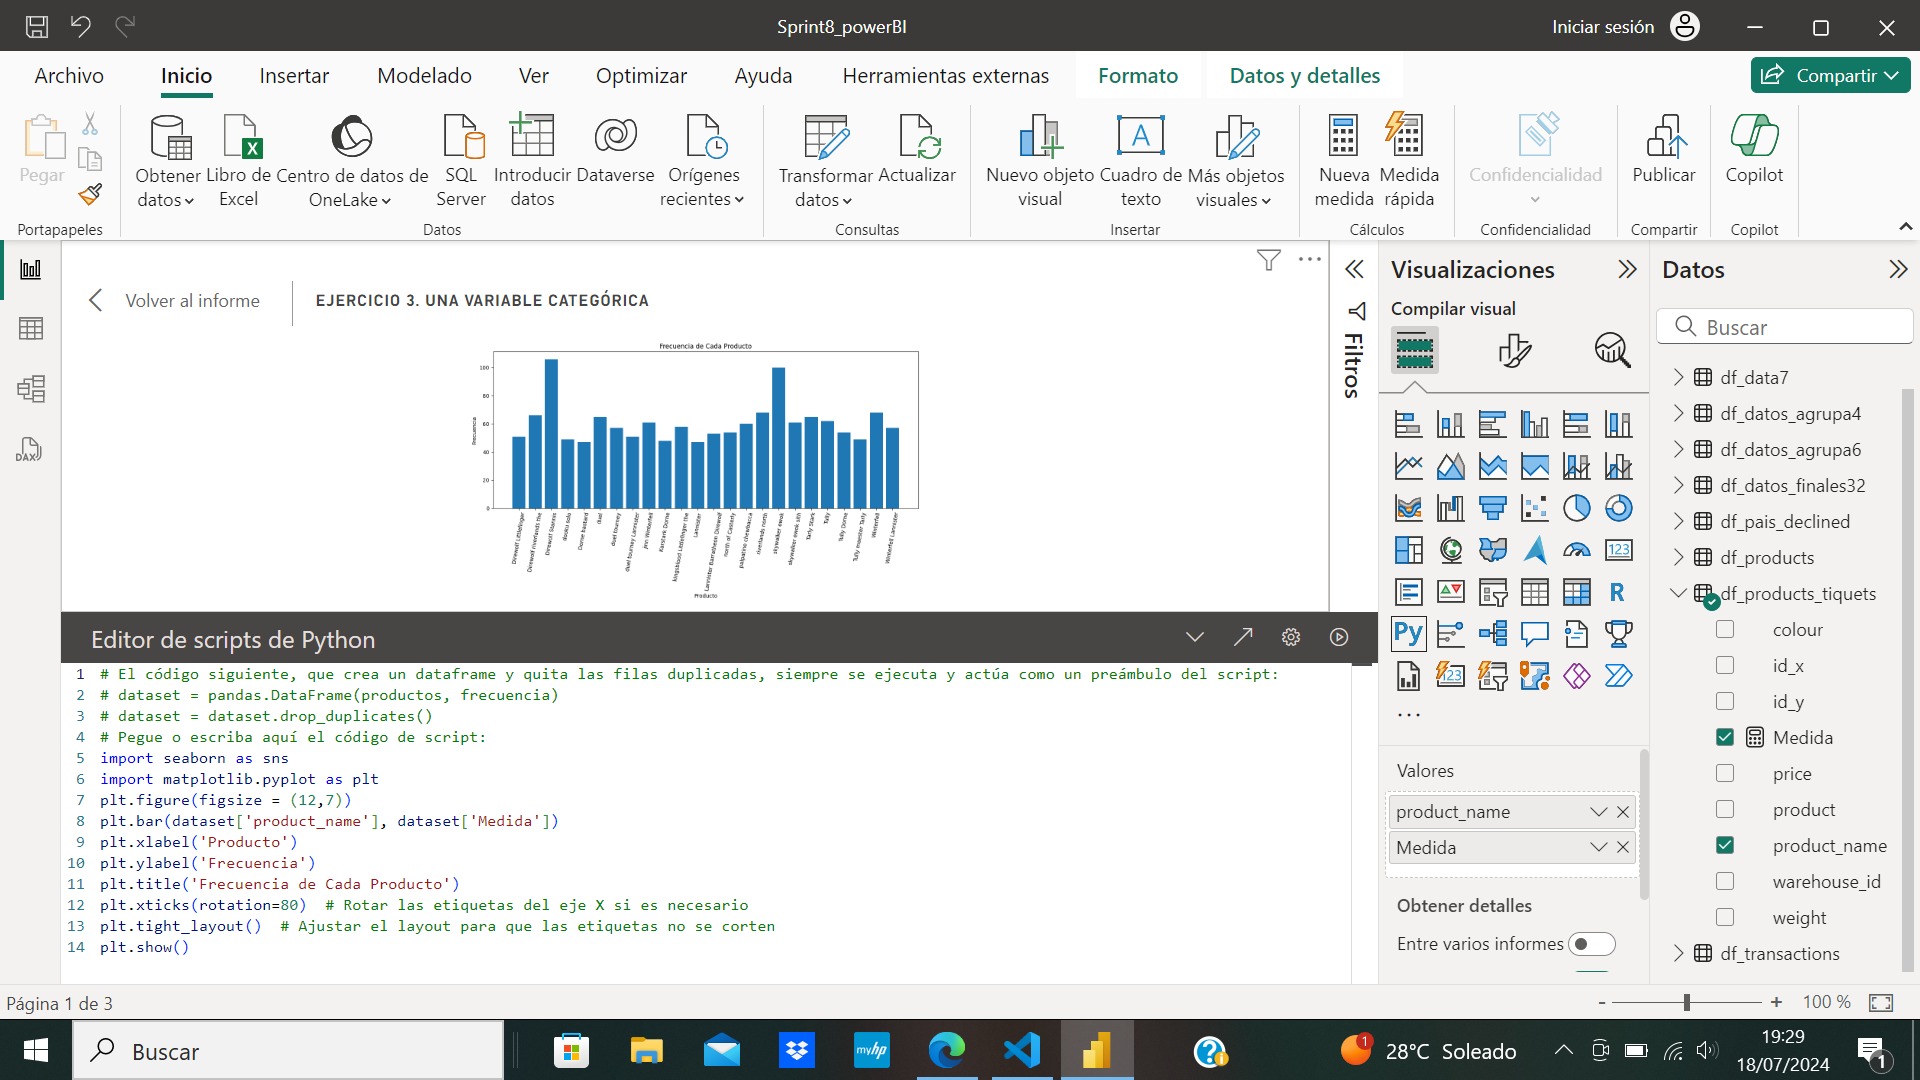

## Ejercicio 4: Una variable categórica y una numérica.

C:\Users\34622\AppData\Local\Temp\ipykernel_9056\328050794.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_pais = pd.read_sql(companies, operaciones)
C:\Users\34622\AppData\Local\Temp\ipykernel_9056\328050794.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_precio = pd.read_sql(precio, operaciones)


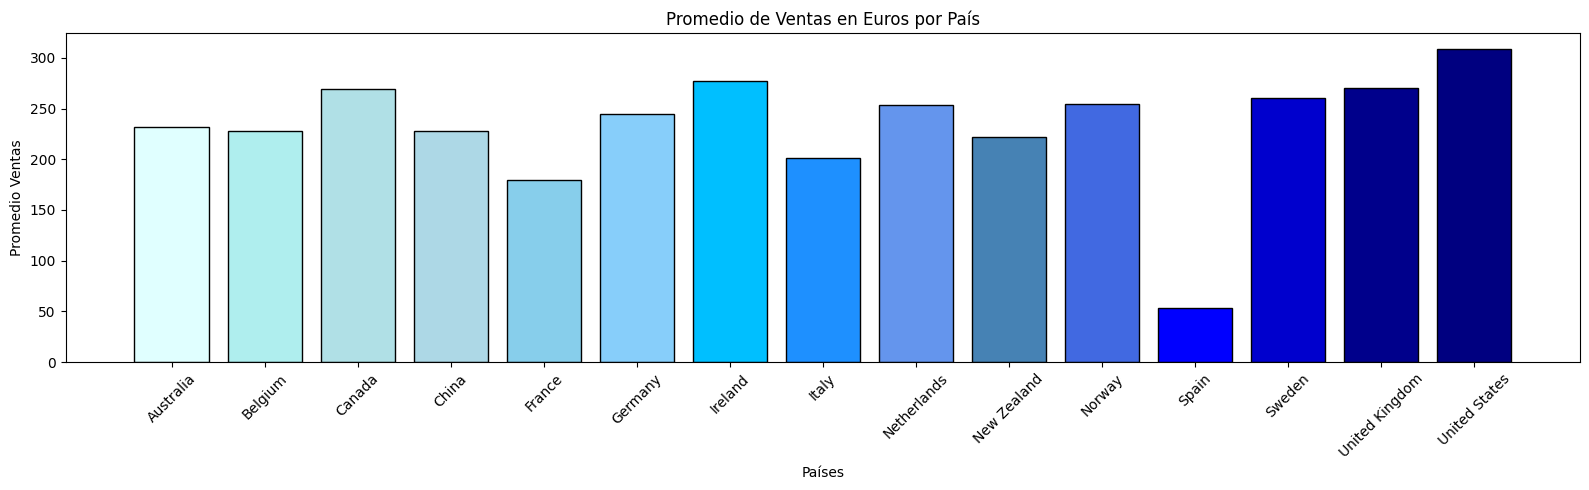

In [28]:
# Selección de datos
precio = 'SELECT * FROM transactions;'
companies = 'SELECT * FROM companies;' 
df_pais = pd.read_sql(companies, operaciones)
df_precio = pd.read_sql(precio, operaciones)

#Renombramos la variable bussiness_id por company_id
df_precio = df_precio.rename(columns={"bussiness_id": "company_id"})
df_datos4 = df_precio.join(df_pais.set_index('company_id'), on = 'company_id')
df_datos4 = df_datos4[['country', 'amount']].dropna()
df_datos_agrupa4 = df_datos4.groupby('country', as_index=False)['amount'].mean().round(2)

#definir una paleta de colores
colores4 = ["#E0FFFF", "#AFEEEE", "#B0E0E6", "#ADD8E6", "#87CEEB", 
            "#87CEFA", "#00BFFF", "#1E90FF", "#6495ED", "#4682B4", 
            "#4169E1", "#0000FF", "#0000CD", "#00008B", "#000080"]

# Crear el gráfico de barras
plt.figure(figsize = (16,5))
plt.bar(df_datos_agrupa4['country'], df_datos_agrupa4['amount'],
        color= colores4, edgecolor='black')
plt.xlabel('Países')
plt.ylabel('Promedio Ventas')
plt.title('Promedio de Ventas en Euros por País')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X si es necesario
plt.tight_layout()  # Ajustar el layout para que las etiquetas no se corten
plt.show()


## La captura de pantalla de la ejecución del código del ejercicio 4 en Power BI
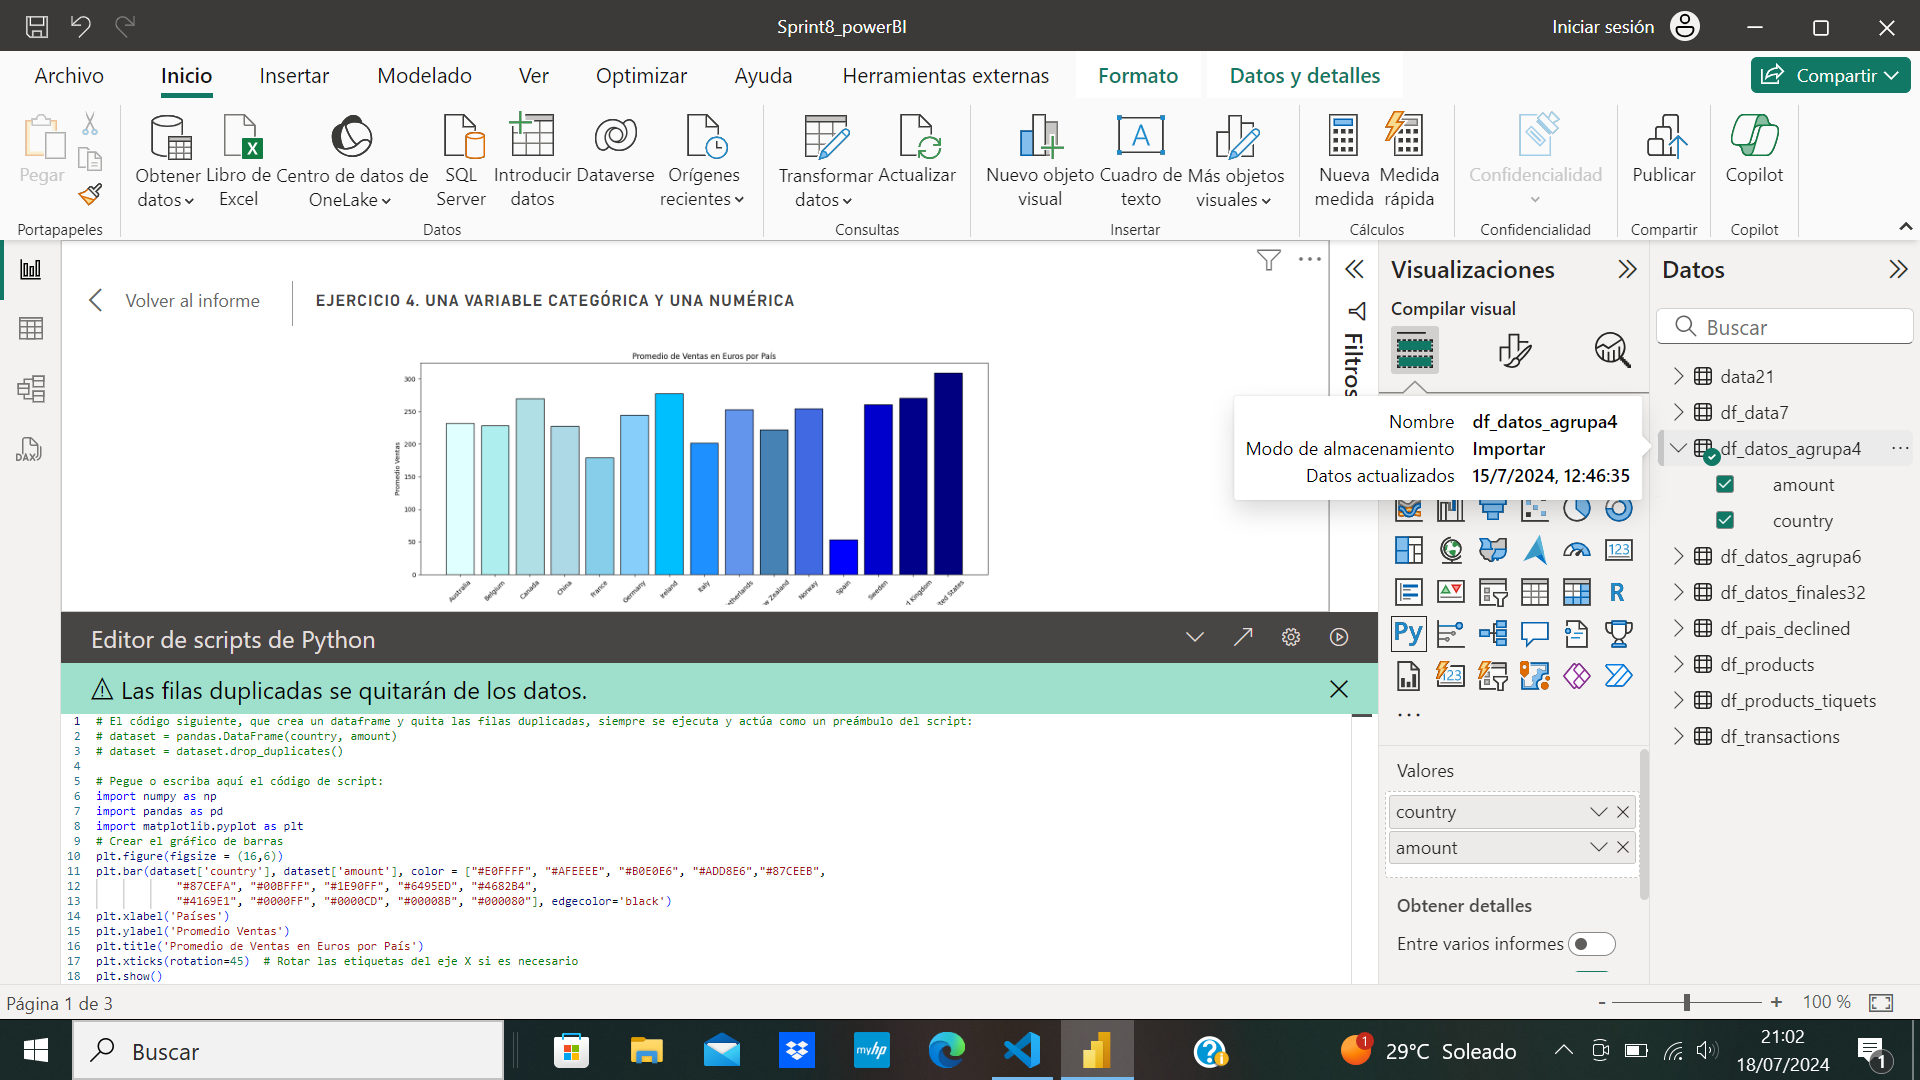

## Ejercicio 5: Dos variables categóricas.

C:\Users\34622\AppData\Local\Temp\ipykernel_9056\3118033869.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_declined = pd.read_sql(declined, operaciones)
C:\Users\34622\AppData\Local\Temp\ipykernel_9056\3118033869.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_pais = pd.read_sql(pais, operaciones)


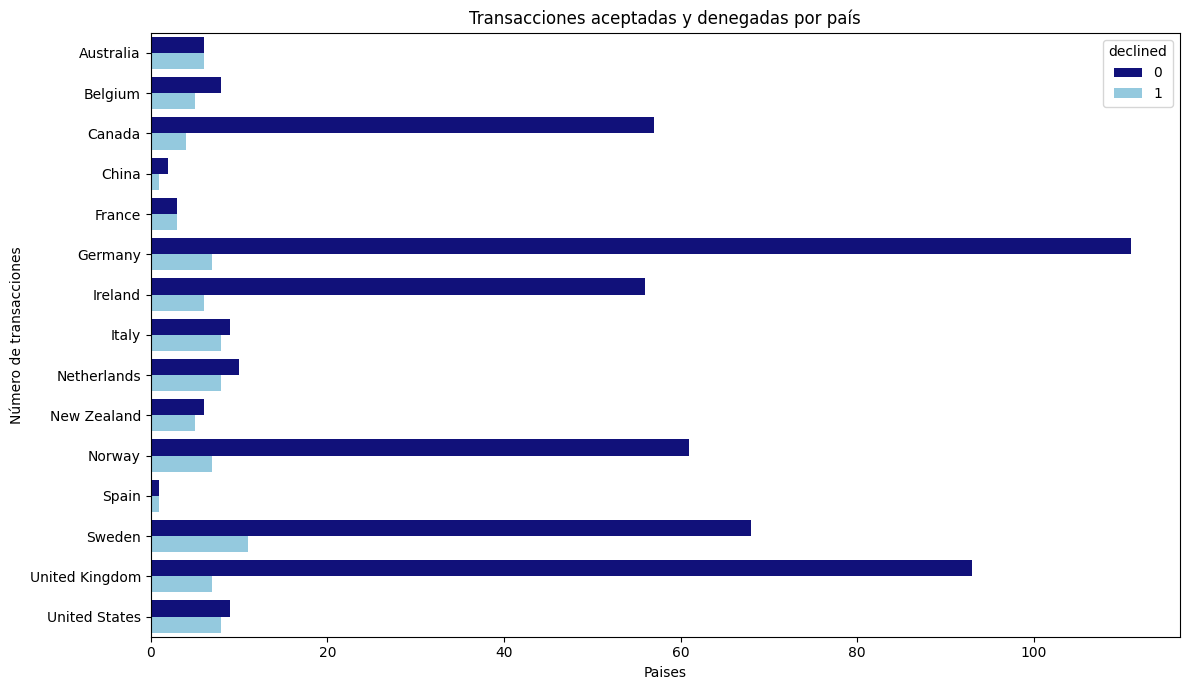

In [29]:
# Selección de datos
declined = 'SELECT * FROM transactions;'
pais = 'SELECT * FROM companies;'
df_declined = pd.read_sql(declined, operaciones)
df_pais = pd.read_sql(pais, operaciones)
df_declined = df_declined.rename(columns={"bussiness_id": "company_id"})
df_pais_declined = pd.merge(df_pais, df_declined, on = 'company_id')
df_pais_declined = df_pais_declined.sort_values('country', ascending=True)
df_pais_declined['declined'] = df_pais_declined['declined'].astype(str)
colores = ["#00008B", "#87CEEB"]

plt.figure(figsize = (12,7))
sns.countplot(data=df_pais_declined, y='country',  hue='declined', palette = colores)
plt.xlabel('Paises')
plt.ylabel('Número de transacciones')
plt.title('Transacciones aceptadas y denegadas por país')
plt.tight_layout()  # Ajustar el layout para que las etiquetas no se corten
plt.show()

## La captura de pantalla de la ejecución del código del ejercicio 5 en Power BI

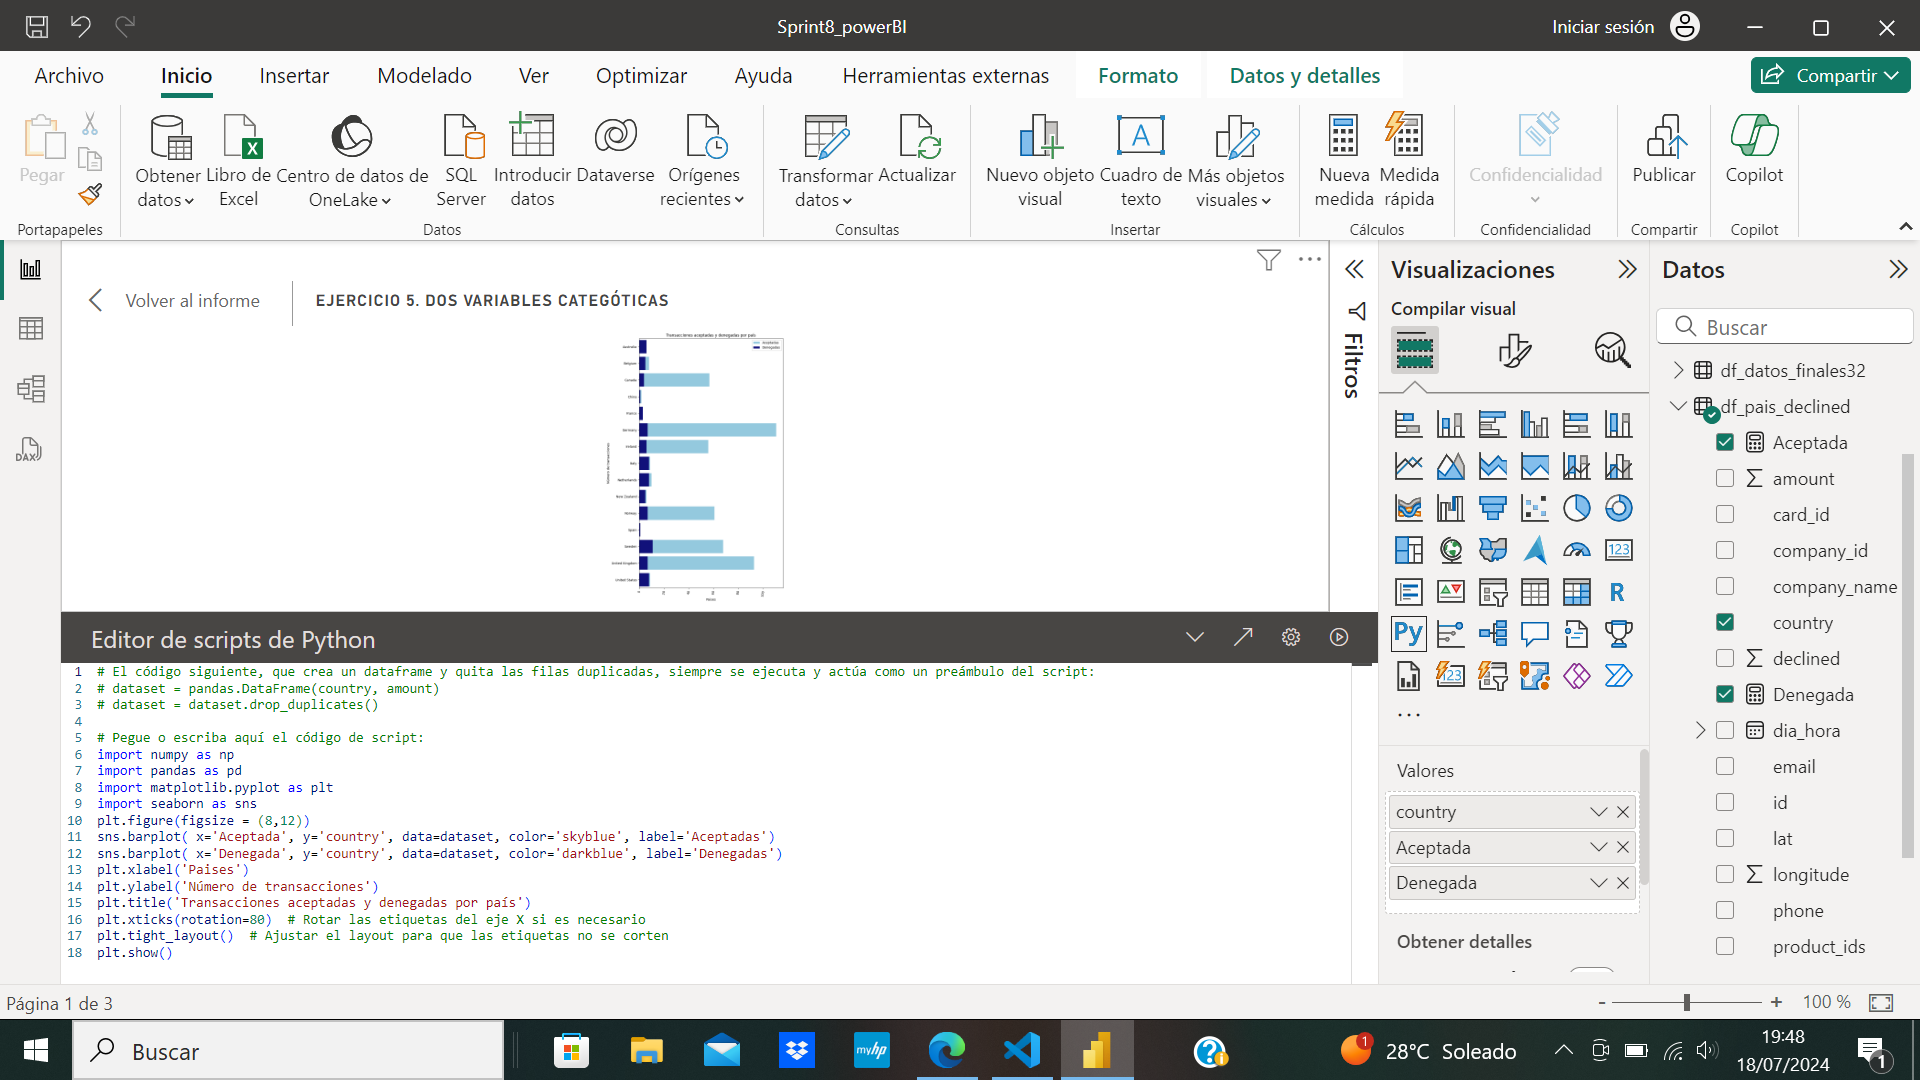

## Ejercicio 6: Tres variables.

C:\Users\34622\AppData\Local\Temp\ipykernel_9056\79669299.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_transactions = pd.read_sql(transactions, operaciones)
C:\Users\34622\AppData\Local\Temp\ipykernel_9056\79669299.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_companies = pd.read_sql(companies, operaciones)


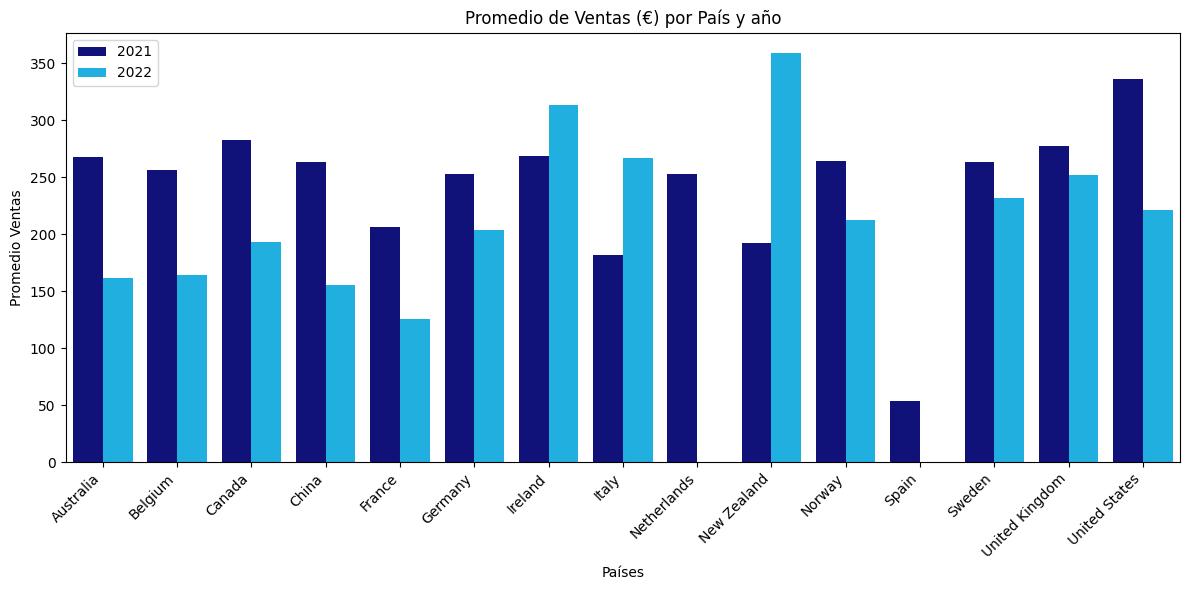

In [30]:
transactions = 'SELECT * FROM transactions;'
companies = 'SELECT * FROM companies;'
df_transactions = pd.read_sql(transactions, operaciones)
df_companies = pd.read_sql(companies, operaciones)
df_transactions = df_transactions.rename(columns={"bussiness_id": "company_id"})
df_datos =  pd.merge(df_companies, df_transactions, on = 'company_id')
df_datos['year'] = df_datos['dia_hora'].dt.year
# Aplicar la función a la columna 'Country'
colores = ['#00008B', '#00BFFF']

# Agrupar por país y año, y calcular el amount promedio
df_datos_agrupa6 = df_datos.groupby(['country', 'year'])['amount'].mean().reset_index().round(2)
dataset1e6 = df_datos_agrupa6[df_datos_agrupa6['year'] ==2021]
dataset2e6 = df_datos_agrupa6[df_datos_agrupa6['year'] == 2022]
df_union6 = pd.concat([dataset1e6,dataset2e6])

# crear gráfico de barras
plt.figure(figsize = (12,6))
sns.barplot(x='country', y='amount', hue ='year', data = df_union6, palette = colores,  dodge=True)
plt.legend()
plt.xlabel('Países')
plt.ylabel('Promedio Ventas')
plt.title('Promedio de Ventas (€) por País y año')
plt.xticks(rotation=45, ha='right') # Rotar las etiquetas del eje X si es necesario
# Ajustar el layout para que las etiquetas no se corten
plt.tight_layout()
plt.show()

## La captura de pantalla de la ejecución del código del ejercicio 6 en Power BI

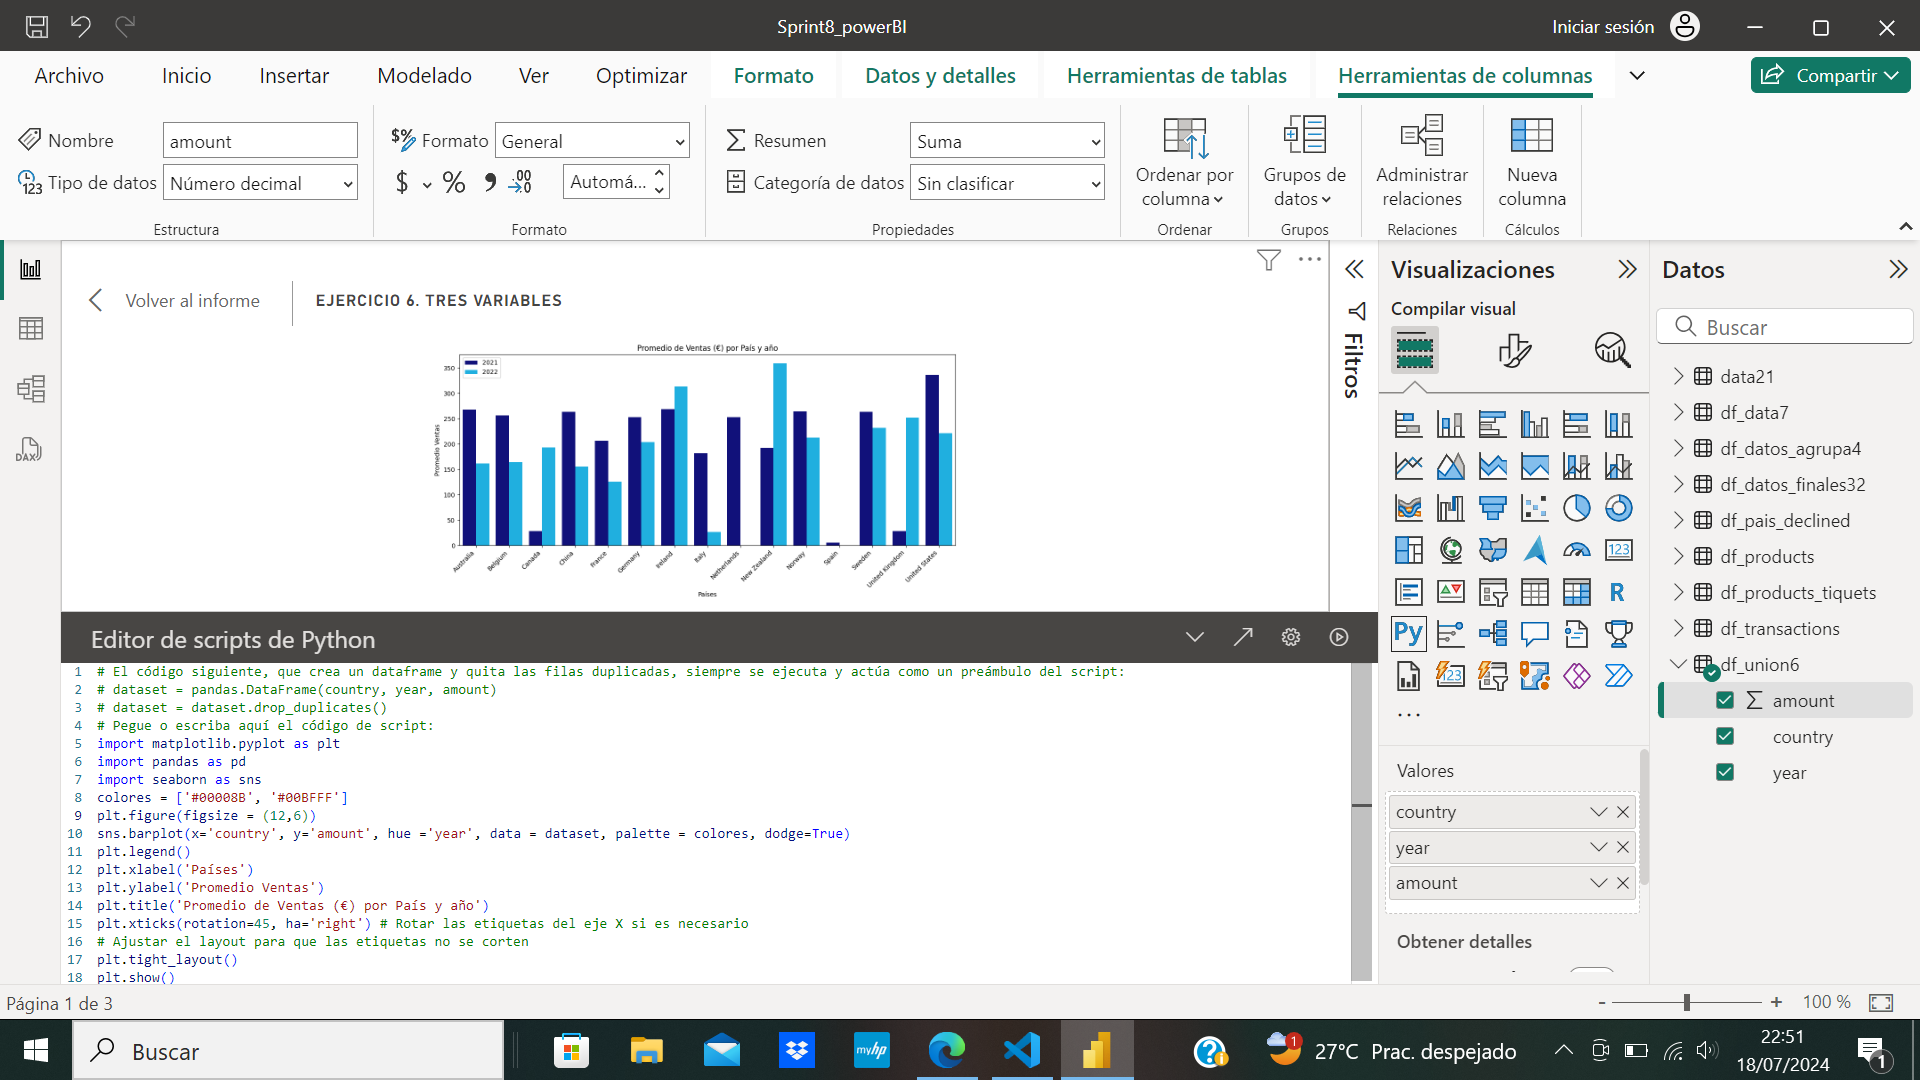

### Ejercicio 7: Graficar un Pairplot.

C:\Users\34622\AppData\Local\Temp\ipykernel_9056\3768134707.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_productos = pd.read_sql(productos, operaciones)
C:\Users\34622\AppData\Local\Temp\ipykernel_9056\3768134707.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_transacciones = pd.read_sql(transactions, operaciones)
C:\Users\34622\AppData\Local\Temp\ipykernel_9056\3768134707.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_tiquets = pd.read_sql(tiquets, operaciones)


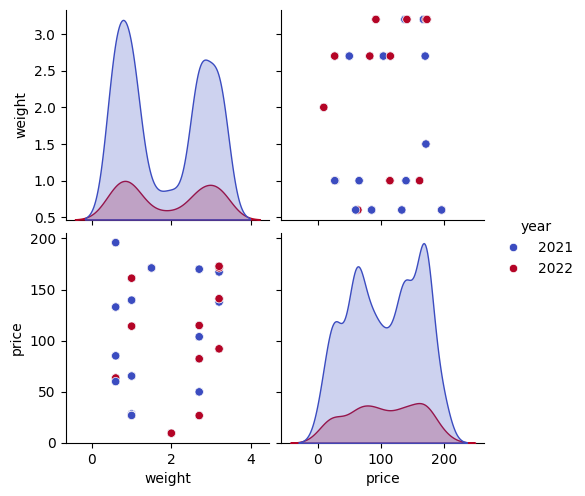

In [31]:
# Selección de datos
productos = 'SELECT * FROM products;'
transactions = 'SELECT * FROM transactions;'
tiquets = 'SELECT * FROM tiquets'
df_productos = pd.read_sql(productos, operaciones)
df_transacciones = pd.read_sql(transactions, operaciones)
df_tiquets = pd.read_sql(tiquets, operaciones)
df_tiquets['product'] = df_tiquets['product'].astype(int)
df_productos['id'] = df_productos['id'].astype(int)
df_product_tiquets = df_tiquets.join(df_productos.set_index('id'), on = 'product')
df_final = df_transacciones.join(df_product_tiquets.set_index('id'), on = "id")
df_final['year'] = df_final['dia_hora'].dt.year
df_data7 = df_final[['weight', 'price', 'year']].dropna()
# crear gráfico
sns.pairplot(df_data7, hue='year', palette = 'coolwarm')


## La captura de pantalla de la ejecución del código del ejercicio 7 en Power BI

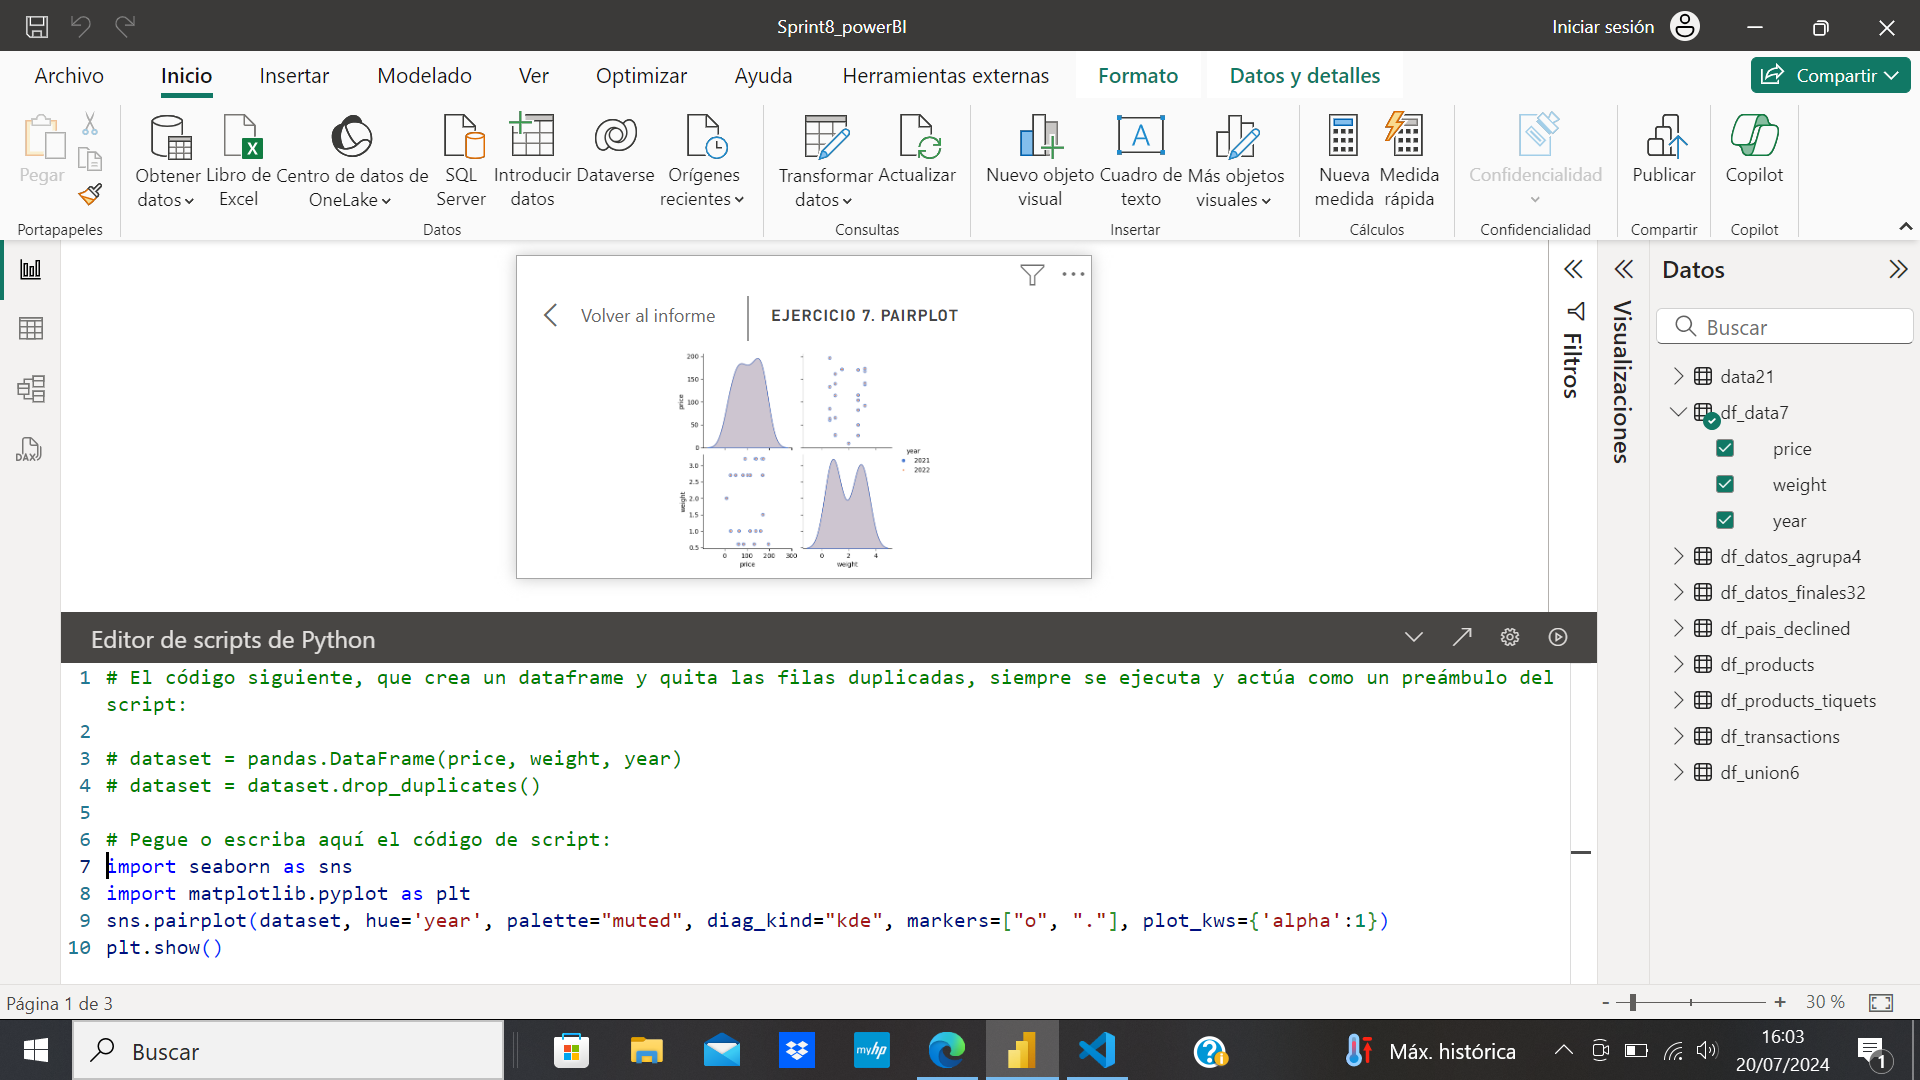

# NIVEL 2

### Ejercicio 1: Correlación de todas las variables numéricas.

C:\Users\34622\AppData\Local\Temp\ipykernel_9056\550430681.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_productos = pd.read_sql(productos, operaciones)
C:\Users\34622\AppData\Local\Temp\ipykernel_9056\550430681.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_transacciones = pd.read_sql(transactions, operaciones)
C:\Users\34622\AppData\Local\Temp\ipykernel_9056\550430681.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_tiquets = pd.read_sql(tiquets, operaciones)


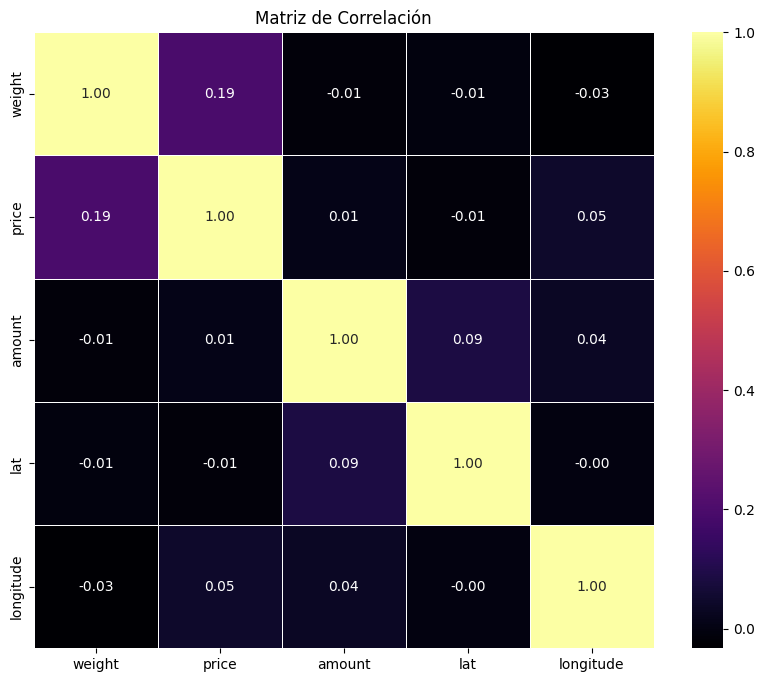

In [32]:
# Selección de datos
productos = 'SELECT * FROM products;'
transactions = 'SELECT * FROM transactions;'
tiquets = 'SELECT * FROM tiquets'
df_productos = pd.read_sql(productos, operaciones)
df_transacciones = pd.read_sql(transactions, operaciones)
df_tiquets = pd.read_sql(tiquets, operaciones)
df_tiquets['product'] = df_tiquets['product'].astype(int)
df_productos['id'] = df_productos['id'].astype(int)
df_product_tiquets = df_tiquets.join(df_productos.set_index('id'), on = 'product')
df_final = df_transacciones.join(df_product_tiquets.set_index('id'), on = "id")
df_data = df_final[['weight', 'price', 'amount', 'lat', 'longitude']]

# Calcular la matriz de correlación de todas las variables numéricas
corr_matrix = df_data.corr(method='pearson')
data21 = pd.DataFrame(corr_matrix)

# crear gráfico
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='inferno', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

## La captura de pantalla de la ejecución del código del ejercicio 1 del Nivel 2 en Power BI

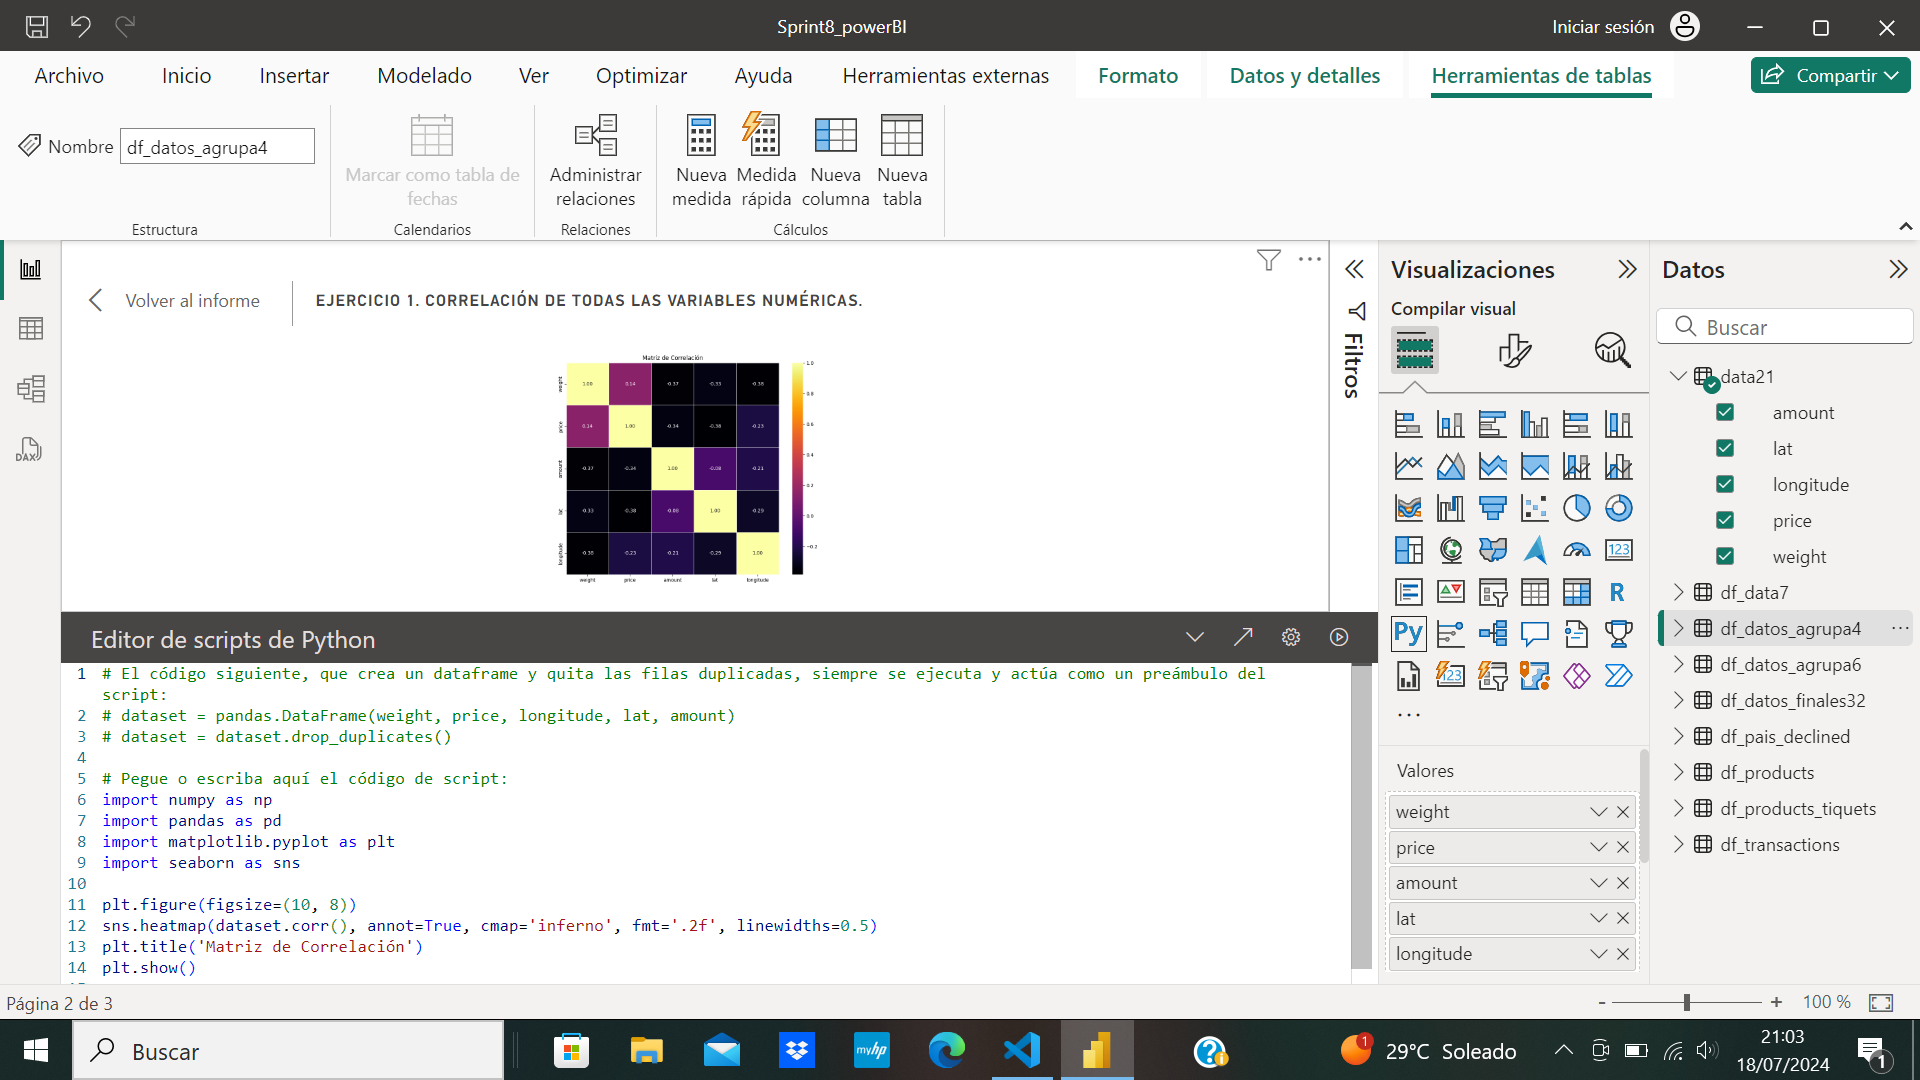

## Ejercicio 2: Implementa un jointplot.

C:\Users\34622\AppData\Local\Temp\ipykernel_9056\3018131795.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_productos = pd.read_sql(productos, operaciones)


<Figure size 1200x1200 with 0 Axes>

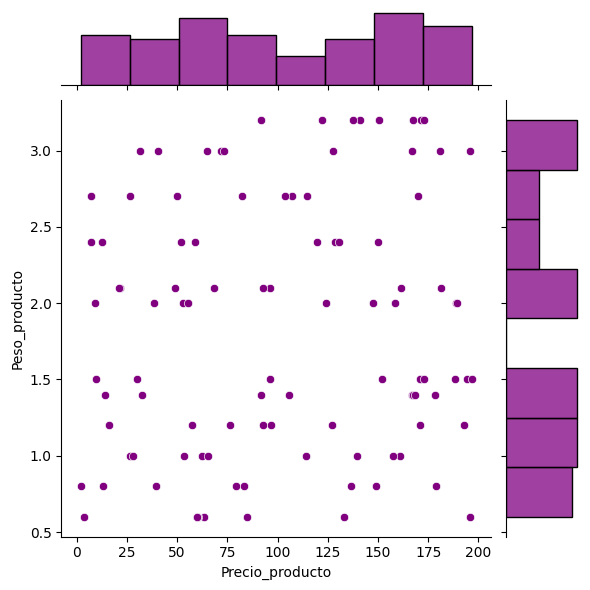

In [33]:
# Selección de datos
productos = 'SELECT * FROM products'
df_productos = pd.read_sql(productos, operaciones)

# Dibujar gráfico de dispersion
plt.figure(figsize=(12, 12))
sns.jointplot(x='price', y='weight', data=df_productos, kind='scatter', color = 'purple')
plt.xlabel('Precio_producto')
plt.ylabel('Peso_producto')
plt.show()

## La captura de pantalla de la ejecución del código del ejercicio 2 del Nivel 2 en Power BI

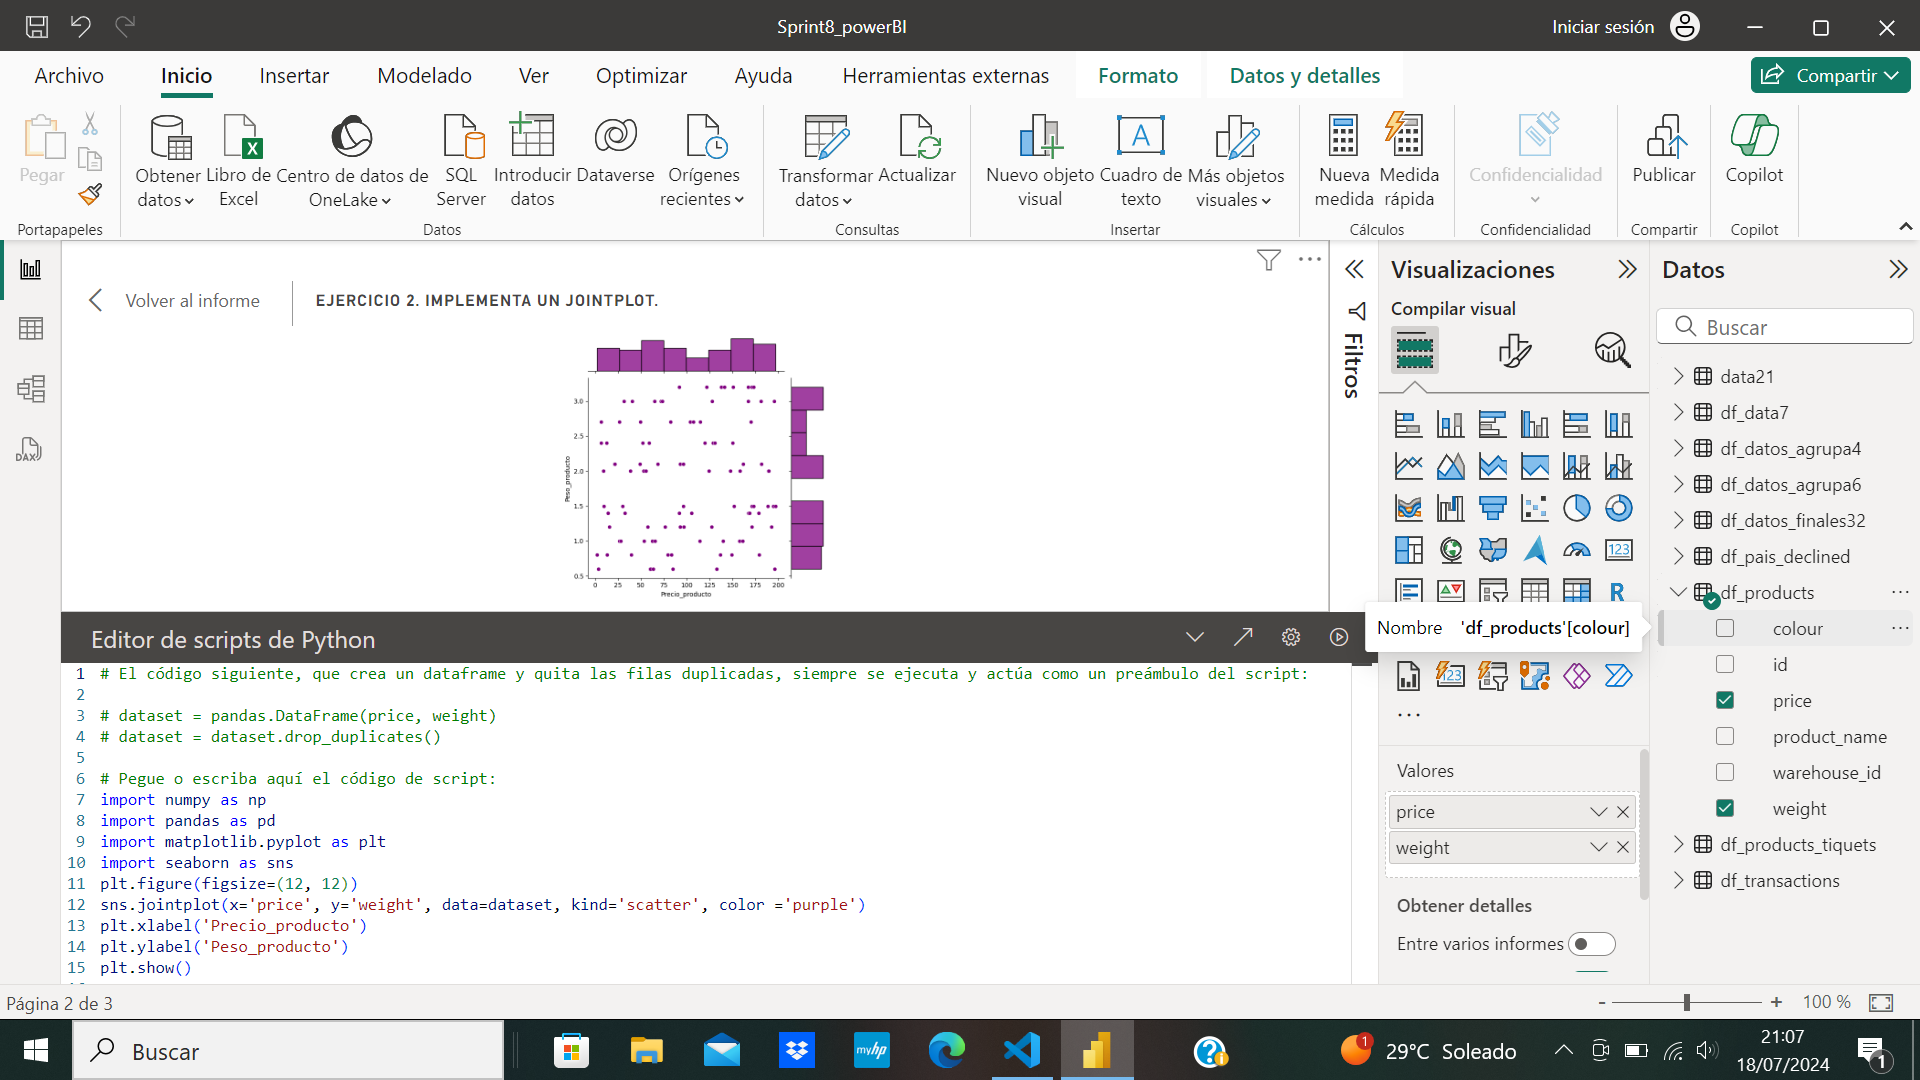

# NIVEL 3

### Ejercicio 1: Implementa un violinplot combinado con otro tipo de gráfico.

C:\Users\34622\AppData\Local\Temp\ipykernel_9056\1362927644.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_transactions = pd.read_sql(transactions, operaciones)


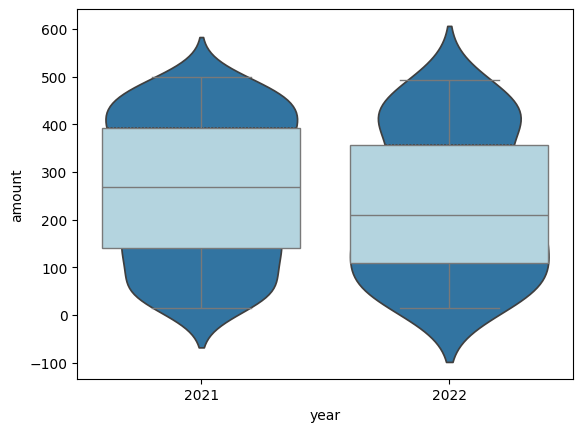

In [34]:
# Selección de datos
transactions = 'SELECT * FROM transactions;'
df_transactions = pd.read_sql(transactions, operaciones)
df_transactions['year']= df_transactions['dia_hora'].dt.year

# Crear un violin plot
sns.violinplot(x='year', y='amount', data=df_transactions, inner = 'quart')
sns.boxplot(x='year', y='amount', data=df_transactions, showcaps=True, color = 'lightBlue')
plt.show()

## La captura de pantalla de la ejecución del código del ejercicio 1 del Nivel 3 en Power BI

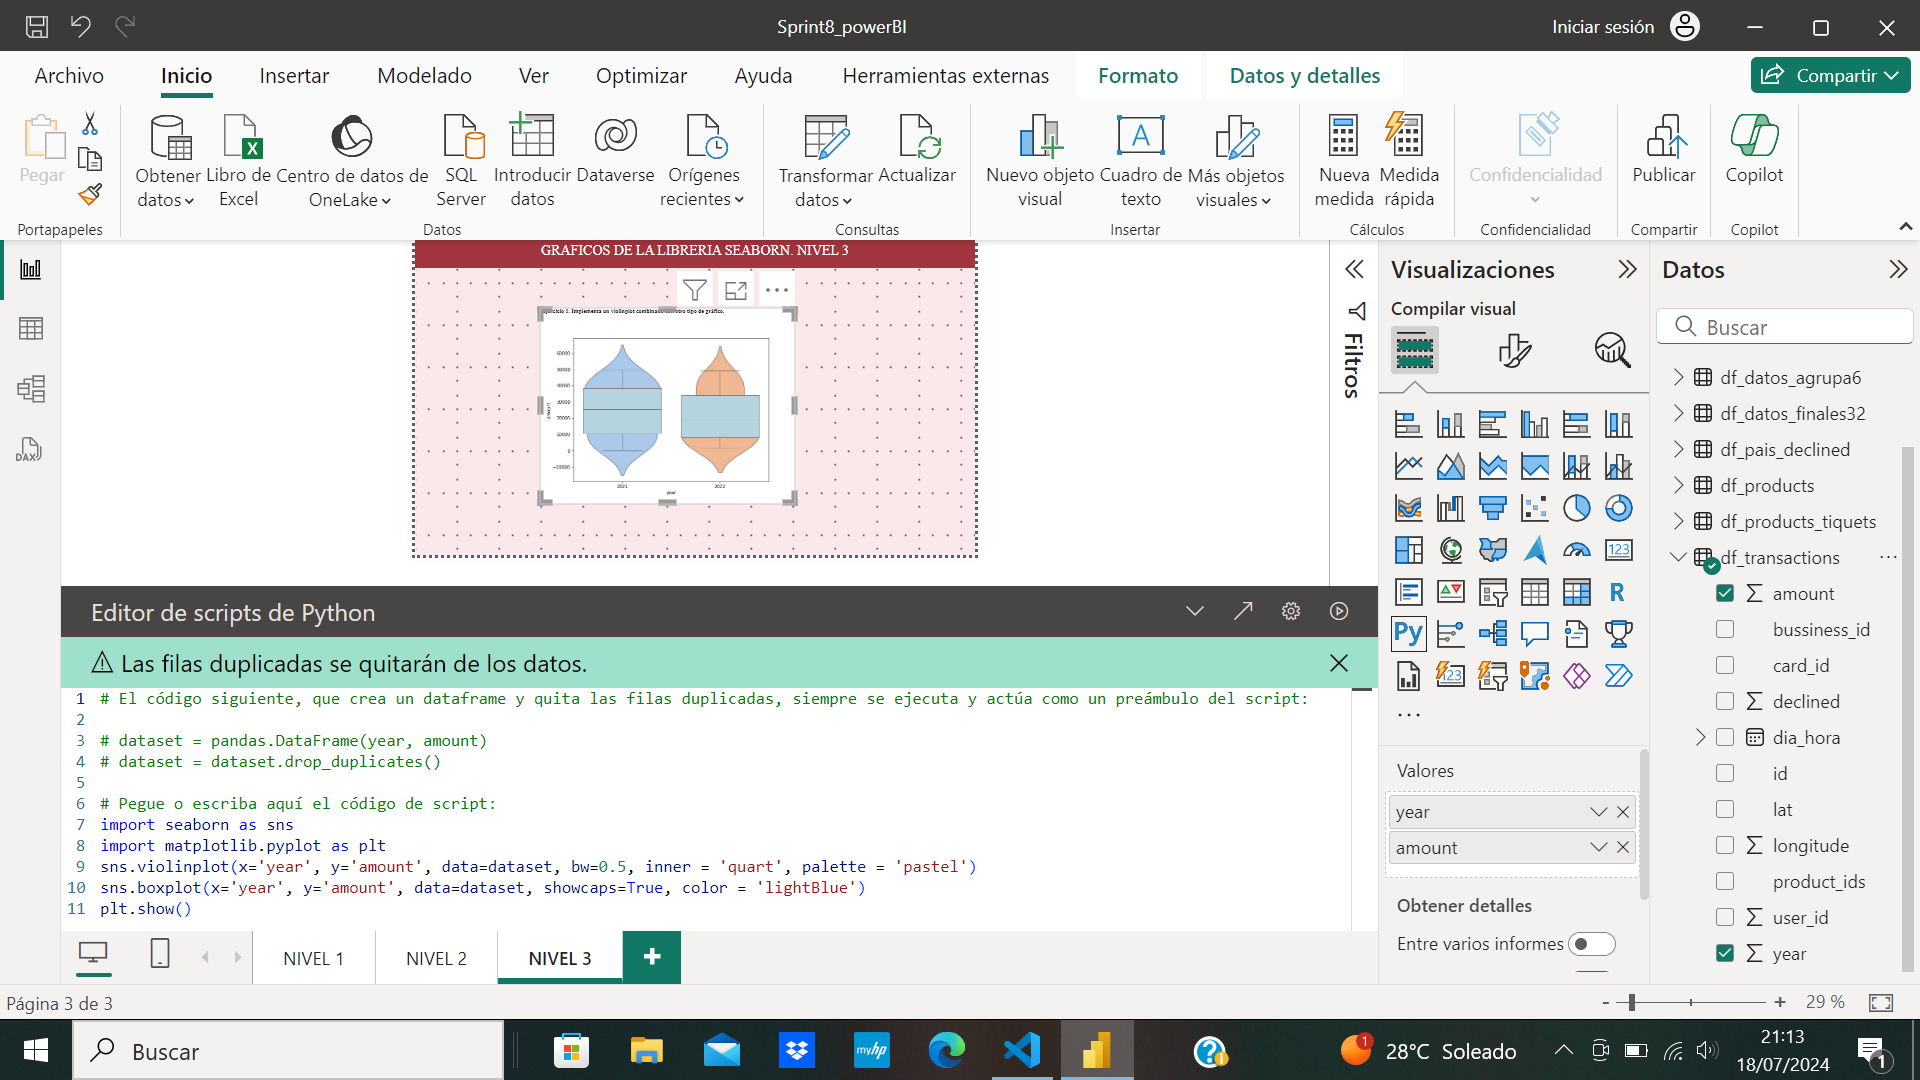

### Ejercicio 2: Genera un FacetGrid para visualizar múltiples aspectos de los datos simultániamente.

C:\Users\34622\AppData\Local\Temp\ipykernel_9056\1573072043.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_transactions = pd.read_sql(transactions, operaciones)
C:\Users\34622\AppData\Local\Temp\ipykernel_9056\1573072043.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_companies = pd.read_sql(companies, operaciones)


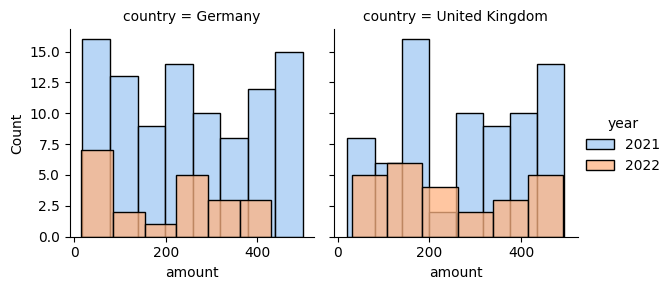

In [36]:
# Selección de datos
transactions = 'SELECT * FROM transactions;'
companies = 'SELECT * FROM companies;'
df_transactions = pd.read_sql(transactions, operaciones)
df_companies = pd.read_sql(companies, operaciones)
df_transactions = df_transactions.rename(columns={"bussiness_id": "company_id"})
df_datos32 =  pd.merge(df_companies, df_transactions, on = 'company_id')
df_datos32['year'] = df_datos32['dia_hora'].dt.year.astype(str)
df_datos_finales = df_datos32[['year', 'country', 'amount']].sort_values('country')
paises = ['Germany','United Kingdom']
df_datos_finales32 = df_datos_finales[df_datos_finales['country'].isin(paises)]

# creación de un gráfico Facetgrid
g = sns.FacetGrid(df_datos_finales32 , col="country", hue = 'year', palette = 'pastel')
g.map(sns.histplot, "amount")
g.add_legend()
plt.show()

## La captura de pantalla de la ejecución del código del ejercicio 2 del Nivel 3 en Power BI

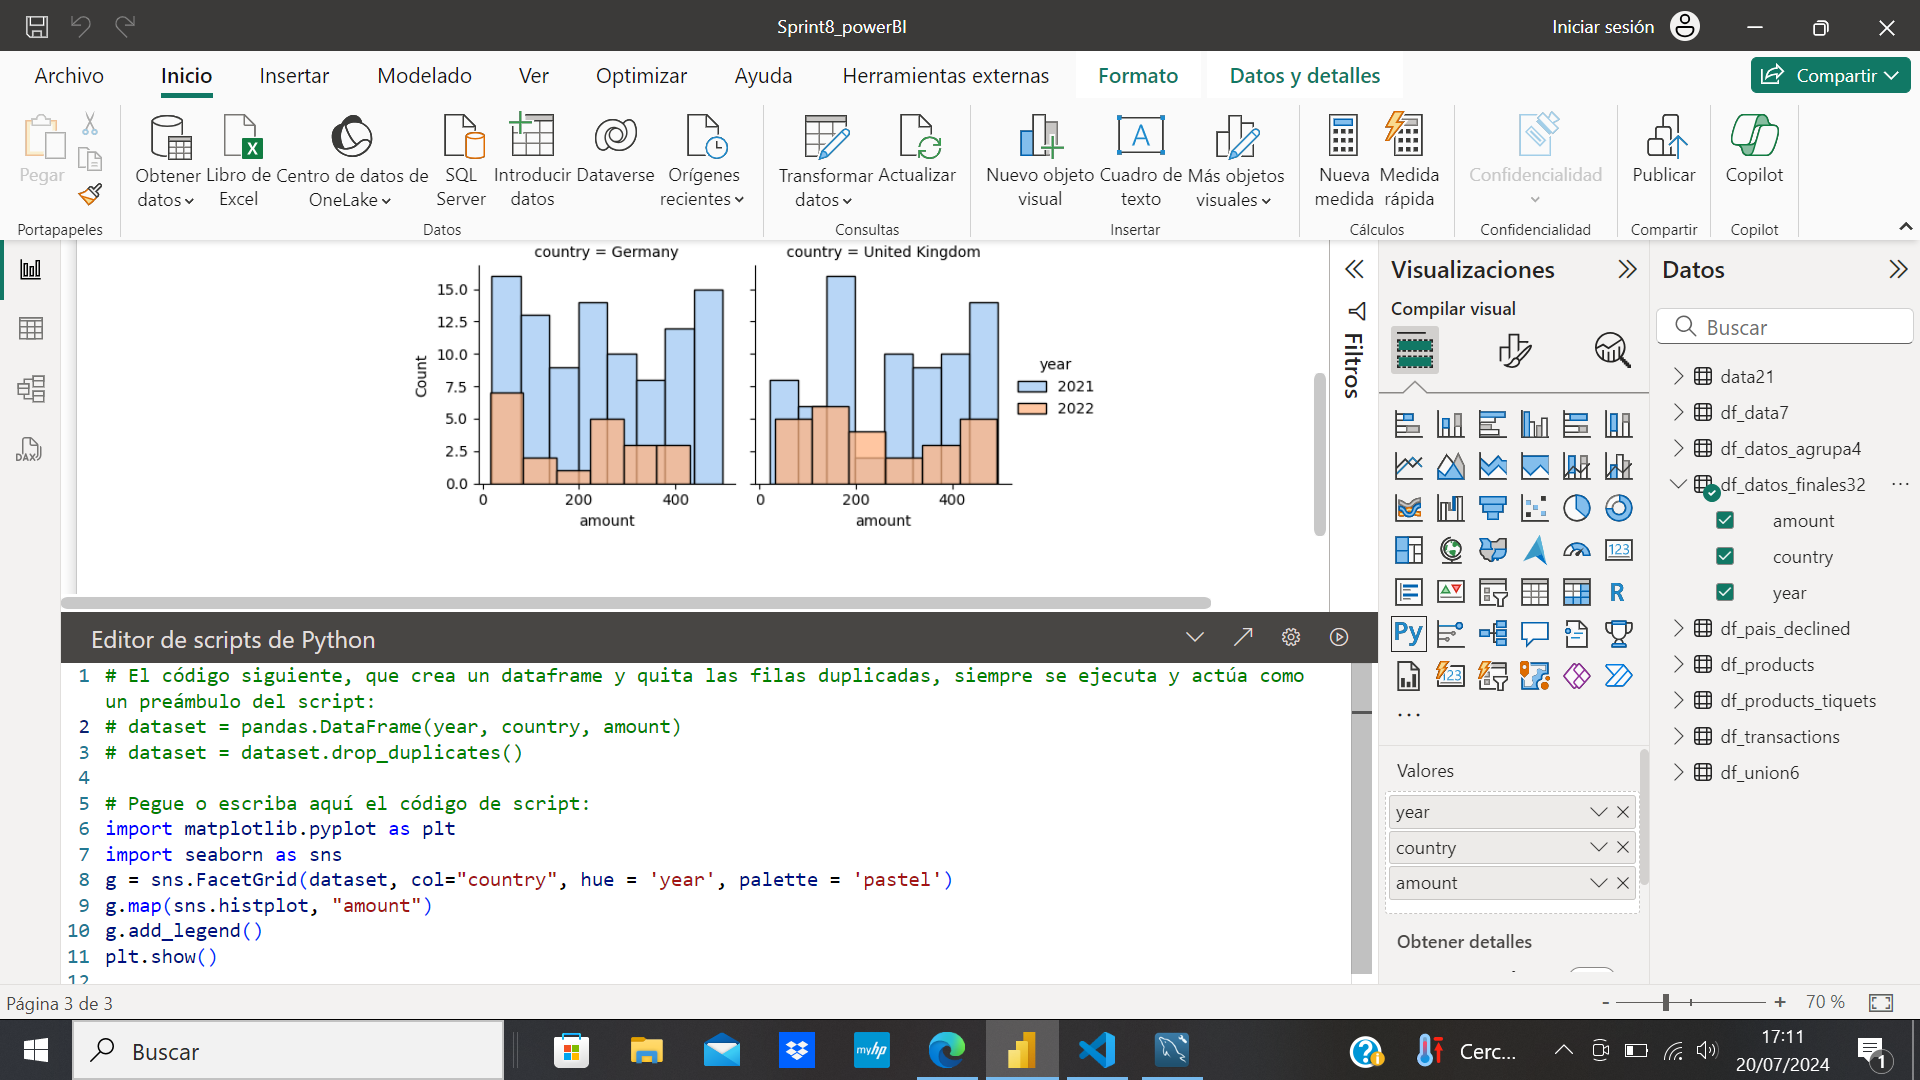